Searching 1 using Binary Search
Searching 1 using Iterative Search
Searching 10 using Binary Search
Searching 10 using Iterative Search
Searching 100 using Binary Search
Searching 100 using Iterative Search
Searching 1000 using Binary Search
Searching 1000 using Iterative Search
Searching 10000 using Binary Search
Searching 10000 using Iterative Search
Searching 100000 using Binary Search
Searching 100000 using Iterative Search
Searching 1000000 using Binary Search
Searching 1000000 using Iterative Search
Searching 10000000 using Binary Search
Searching 10000000 using Iterative Search


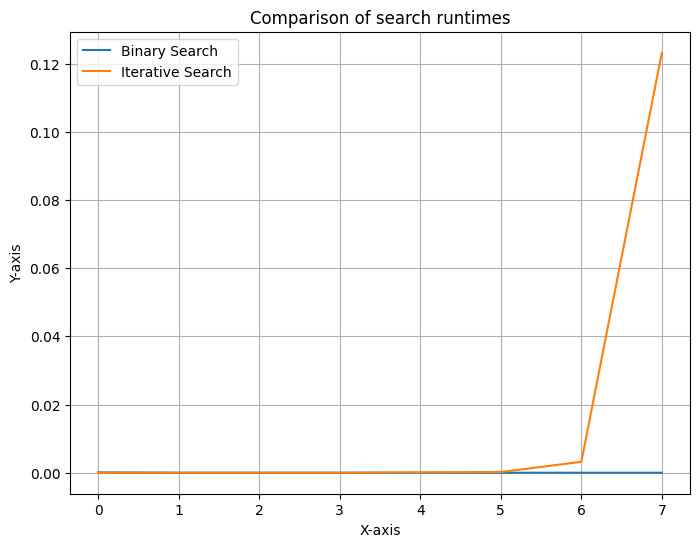

In [4]:
from algorithms.binary_search import BinarySearch
from algorithms.iterative_search import IterativeSearch
import time
from dataclasses import dataclass
import random 
import matplotlib.pyplot as plt
from collections import defaultdict 

no_datasets = 8
datasets = []

@dataclass
class RuntimeMetric:
    name: str
    time_taken_seconds: int

search_algorithms = [
    BinarySearch(),
    IterativeSearch()
]

arr_size = 1

for ds in range(0, no_datasets):
    unique_numbers = []

    for num in range(0, arr_size):
        unique_numbers.append(num)

    datasets.append(unique_numbers)
    arr_size *= 10

results = defaultdict(list)

for dataset in datasets:
    for search_algorithm in search_algorithms:
        start = time.time()
        target = random.randint(0, len(dataset) - 1)
        ds_len = len(dataset)
        print(f"Searching {ds_len} using {search_algorithm.name()}")
        search_algorithm.search(dataset, target) 
        end = time.time()

        results[search_algorithm.name()].append(
             RuntimeMetric(
                name=search_algorithm.name(), 
                time_taken_seconds=round(end - start, 4)
            )
        )

def plot_line_graph(metrics):
    plt.figure(figsize=(8, 6))

    for sa_metric in metrics.items():
        data = [metric.time_taken_seconds for metric in sa_metric[1]]
        plt.plot(data, label=sa_metric[0])
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Comparison of search runtimes')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_line_graph(results)

